In [120]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [121]:
base_data = pd.read_csv('medinform.csv', encoding='cp1252')

**ANALYSE BASE DATA**

In [122]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    195 non-null    int64  
 1   word          195 non-null    object 
 2   case_freq     195 non-null    int64  
 3   control_freq  195 non-null    float64
 4   mwu_u         195 non-null    int64  
 5   mwu_p         195 non-null    float64
 6   freq_ratio    195 non-null    float64
 7   freq_diff     195 non-null    float64
 8   afinn         32 non-null     object 
 9   emolex        41 non-null     object 
 10  liwc2015      22 non-null     object 
 11  opinion       25 non-null     object 
 12  pattern       9 non-null      object 
 13  swn           86 non-null     object 
dtypes: float64(4), int64(3), object(7)
memory usage: 21.5+ KB


In [123]:
base_data.head()

,Unnamed: 0,word,case_freq,control_freq,mwu_u,mwu_p,freq_ratio,freq_diff,afinn,emolex,liwc2015,opinion,pattern,swn
0,1,self,4279,2217.642490,4038260844,0.0,1.929302,2060.860661,NaN,NaN,NaN,NaN,NaN,NaN
1,2,harm,2916,1242.740515,4058706079,0.0,2.346568,1673.434190,negative,negative,negative,negative,NaN,negative
2,3,ward,5555,3957.645900,4095271325,0.0,1.403544,1597.086158,NaN,NaN,NaN,NaN,NaN,negative
3,4,overdose,1717,324.209649,4191119922,0.0,5.295901,1392.772579,NaN,negative,NaN,NaN,NaN,NaN
4,5,staff,5670,4280.643267,4182314937,0.0,1.324579,1389.404933,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
base_data['word']

0             self
1             harm
2             ward
3         overdose
4            staff
          ...     
190         health
191     medication
192    appointment
193             mr
194         mental
Name: word, Length: 195, dtype: object

In [125]:
frame = {
    'word': base_data['word'],
    'case_frequency': base_data['case_freq'],
    'control_frequency': base_data['control_freq']
}

In [126]:
df = pd.DataFrame(frame)

In [127]:
print(df)

            word  case_frequency  control_frequency
0           self            4279        2217.642490
1           harm            2916        1242.740515
2           ward            5555        3957.645900
3       overdose            1717         324.209649
4          staff            5670        4280.643267
..           ...             ...                ...
190       health            2282        3053.283579
191   medication            3757        4773.890478
192  appointment            1584        2708.010532
193           mr            1198        2335.991514
194       mental            3093        4335.044419

[195 rows x 3 columns]


**DATA ENGINEERING FOR VISUAL DISPLAY OF THE DATA**

In [128]:
case_frequency = df['case_frequency']
case_frequency.describe()

count     195.000000
mean     1153.743590
std      1093.215033
min        40.000000
25%       379.500000
50%       810.000000
75%      1563.500000
max      5725.000000
Name: case_frequency, dtype: float64

In [129]:
highest_frequencies = [word for word in df['case_frequency'] if word > 1567]

In [130]:
print(len(highest_frequencies))

48


In [131]:
print(highest_frequencies)

[4279, 2916, 5555, 1717, 5670, 2072, 5725, 2276, 3081, 2333, 2313, 2356, 1813, 3316, 4347, 3005, 2189, 1915, 1945, 2341, 1821, 1844, 2251, 5725, 1744, 2346, 2282, 1926, 2363, 2827, 3421, 1631, 2448, 1636, 2357, 1577, 1659, 3071, 2425, 1593, 2643, 2863, 1621, 1640, 2282, 3757, 1584, 3093]


In [132]:
highest_words = []

for index, each in enumerate(df['word']):
  for index2, word in enumerate(df['case_frequency']):
    if word > 1567 and index == index2:
      highest_words.append(each)
      break

In [133]:
print(highest_words)

['self', 'harm', 'ward', 'overdose', 'staff', 'suicidal', 'said', 'alcohol', 'risk', 'admission', 'thoughts', 'go', 'discharge', 'home', 'plan', 'hospital', 'low', 'call', 'stated', 'asked', 'informed', 'feeling', 'history', 'would', 'felt', 'back', 'agreed', 'feels', 'patient', 'leave', 'mood', 'told', 'could', 'going', 'today', 'morning', 'currently', 'reported', 'night', 'treatment', 'assessment', 'care', 'attended', 'state', 'health', 'medication', 'appointment', 'mental']


In [134]:
print(len(highest_words))

48


In [135]:
top_50 = {
    'top words': highest_words,
    'top frequencies': highest_frequencies
}

top_50_frame = pd.DataFrame(top_50)

In [136]:
top_50_frame

,top words,top frequencies
0,self,4279
1,harm,2916
2,ward,5555
3,overdose,1717
4,staff,5670
5,suicidal,2072
6,said,5725
7,alcohol,2276
8,risk,3081
9,admission,2333


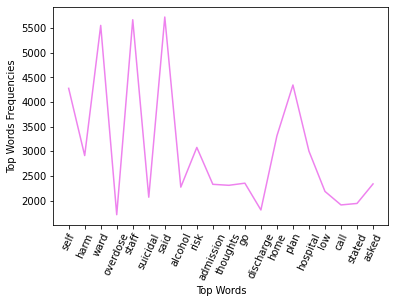

In [137]:
plt.plot(top_50_frame['top words'][:20], top_50_frame['top frequencies'][:20], color='violet')
plt.xlabel('Top Words')
plt.ylabel('Top Words Frequencies')
plt.xticks(top_50_frame['top words'][:20], rotation=65)
#plt.margins(0.001)
plt.show()

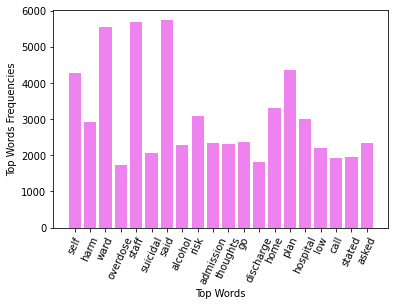

In [138]:
plt.bar(top_50_frame['top words'][:20], top_50_frame['top frequencies'][:20], color='violet')
plt.xlabel('Top Words')
plt.ylabel('Top Words Frequencies')
plt.xticks(top_50_frame['top words'][:20], rotation=65)
#plt.margins(0.001)
plt.show()

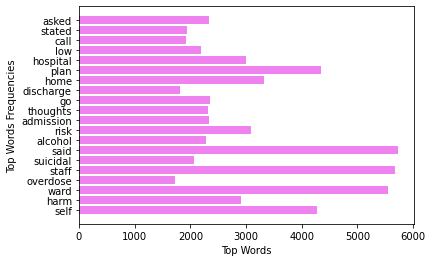

In [139]:
plt.barh(top_50_frame['top words'][:20], top_50_frame['top frequencies'][:20], color='violet')
plt.xlabel('Top Words')
plt.ylabel('Top Words Frequencies')
#plt.xticks(top_50_frame['top words'][:20], rotation=65)
#plt.margins(0.001)
plt.show()

In [140]:
from wordcloud import WordCloud, STOPWORDS

In [141]:
#convert dataframe to a string to input into the WordCloud Class

In [142]:
words_strings = ' '.join(highest_words)
stopwords = set(STOPWORDS)

In [143]:
print(words_strings)

self harm ward overdose staff suicidal said alcohol risk admission thoughts go discharge home plan hospital low call stated asked informed feeling history would felt back agreed feels patient leave mood told could going today morning currently reported night treatment assessment care attended state health medication appointment mental


In [144]:
wordcloud = WordCloud(width = 1400, height = 800, stopwords = stopwords, min_font_size = 10).generate(words_strings)

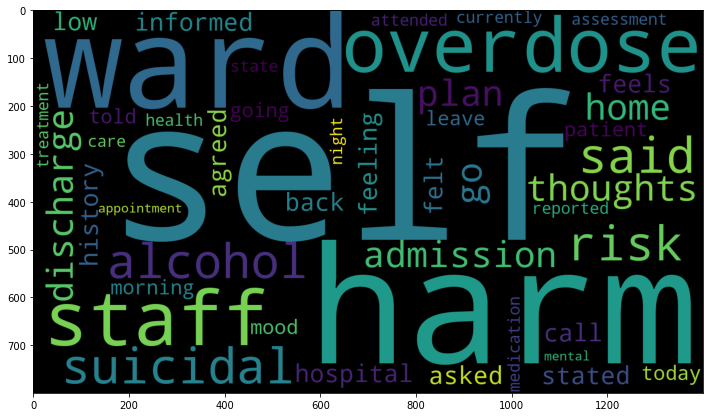

In [145]:
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud)
plt.show()

**PREPROCESSING TWITTER DATA SAMPLE**

**TOKENIZATION AND ANALYSIS OF THE TOKENS**

**DISTANCE COMPUTATION 1 - JACCARD**

**DISTANCE COMPUTATION 2 - EUCLIDEAN**

**DISTANCE COMPUTATION 3 - TF-IDF**

**DISTANCE COMPUTATION 4 - BERT**

**DISTANCE COMPUTATION 5 - CUSTOM ALGORITHM**

**ACCURACY METRICS OF THE VARIOUS DOCUMENT SIMILARITY ALGORITHMS**

**INTERPRETATION OF RESULTS**